<a href="https://colab.research.google.com/github/ClauCll/Curso_ML_A_Z/blob/master/Regresi%C3%B3n/Regresion_Bajas_Antiguedad_v7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Cuantas serán las bajas voluntarias de los clientes fijos para un periodo x. (Agosto - Diciembre 2020)
 

In [121]:
import pandas as pd
import numpy as np

#Gráfico
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt 
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns

import gspread
from oauth2client.client import GoogleCredentials 
from google.colab import auth
# Autoriza Claudia
auth.authenticate_user()
gc = gspread.authorize (GoogleCredentials.get_application_default())

### leemos datos

In [122]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [123]:
data = pd.read_csv('/content/drive/My Drive/Dataset/BAJAS.txt',delimiter='~')
 
X  = data.iloc[:,:-1].values
Y  = data.iloc[:,8].values
Y = Y[:,np.newaxis]

In [124]:
#data.info()#
#data.describe()
data

,MES_BAJA,TRIM_1,TRIM_2,TRIM_3,TRIM_4,ENTRE_1_2_ANIOS,ENTRE_3_4_ANIOS,MAS_5_ANIOS,TOTAL_BAJAS
0,11,35,19,22,153,484,294,11,1018
1,6,54,35,23,174,672,369,58,1384
2,2,39,19,32,343,925,511,22,1889
3,3,48,24,25,240,736,424,38,1534
4,10,29,15,17,134,470,294,19,978
5,12,42,19,15,181,603,1470,105,2435
6,8,19,18,19,168,590,294,6,1114
7,9,26,19,20,142,498,316,10,1031
8,4,45,24,20,173,546,318,29,1153
9,5,56,20,24,203,546,314,21,1183


In [126]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression

# 1trim
#entrenamos datos
x1 = X[:,0]
x1 = x1[:,np.newaxis]
y1 = X[:,1]
y1 = y1[:,np.newaxis]

x_train, x_test, y_train, y_test = train_test_split(x1, y1,test_size = 0.2,
                                        random_state = 0,
                                        shuffle      = True
                                    )


#Modelo regresión Logística
logreg= LogisticRegression()
logreg.fit(x_train, y_train)
y_predic_test_m1 = logreg.predict(x_test)
y_predic_train_m1 = logreg.predict(x_train)
print('Precisión Modelo Regresión Logística')
print(logreg.score(x_train,y_train))


Precisión Modelo Regresión Logística
0.6666666666666666


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [127]:
print('Datos entrenamiento')
print(y_train)
print('Resultado predicción entrenamiento')
print(pd.DataFrame(y_predic_train_m1))

Datos entrenamiento
[[31]
 [39]
 [45]
 [54]
 [26]
 [56]
 [48]
 [35]
 [42]]
Resultado predicción entrenamiento
    0
0  31
1  31
2  45
3  54
4  26
5  56
6  39
7  42
8  42


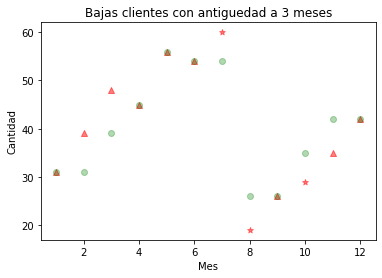

In [128]:
plt.scatter(x_train, y_train, c='red', marker='^', alpha=0.5)
plt.scatter(x_test , y_test , c='red', marker='*', alpha=0.5)
plt.scatter(x_train, y_predic_train_m1, c='green', marker='o', alpha=0.3)
plt.scatter(x_test , y_predic_test_m1 , c='green', marker='o', alpha=0.3)
plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.title('Bajas clientes con antiguedad a 3 meses')
plt.show()

In [129]:
#Guardamos los resultados
concat_y1, concat_x1 = [],[]

for _ in list(range(len(y_predic_valor))):
  concat_y1.append(y_predic_train_m1[_])
  concat_x1.append(x_train[_])

for _ in list(range(len(y_predic_valor_t))):
  concat_y1.append(y_predic_test_m1[_])
  concat_x1.append(x_test[_])

In [131]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression

# 2trim
#entrenamos datos
x1 = X[:,0]
x1 = x1[:,np.newaxis]
y1 = X[:,2]
y1 = y1[:,np.newaxis]

x_train, x_test, y_train, y_test = train_test_split(x1, y1,test_size = 0.2,
                                        random_state = 0,
                                        shuffle      = True
                                    )


#Modelo regresión Logística
logreg= LogisticRegression()
logreg.fit(x_train, y_train)
y_predic_test_m1 = logreg.predict(x_test)
y_predic_train_m1 = logreg.predict(x_train)
print('Precisión Modelo Regresión Logística')
print(logreg.score(x_train,y_train))


Precisión Modelo Regresión Logística
0.6666666666666666


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [132]:
print('Datos entrenamiento')
print(y_train)
print('Resultado predicción entrenamiento')
print(pd.DataFrame(y_predic_train_m1))

Datos entrenamiento
[[22]
 [19]
 [24]
 [35]
 [19]
 [20]
 [24]
 [19]
 [19]]
Resultado predicción entrenamiento
    0
0  22
1  24
2  24
3  19
4  19
5  19
6  24
7  19
8  19


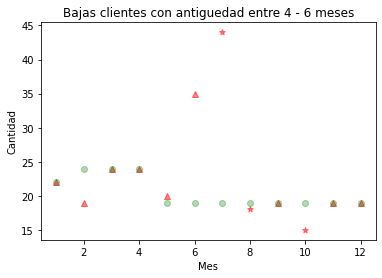

In [133]:
plt.scatter(x_train, y_train, c='red', marker='^', alpha=0.5)
plt.scatter(x_test , y_test , c='red', marker='*', alpha=0.5)
plt.scatter(x_train, y_predic_train_m1, c='green', marker='o', alpha=0.3)
plt.scatter(x_test , y_predic_test_m1 , c='green', marker='o', alpha=0.3)
plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.title('Bajas clientes con antiguedad entre 4 - 6 meses')
plt.show()

In [134]:
#Guardamos los resultados
concat_y2, concat_x2 = [],[]

for _ in list(range(len(y_predic_valor))):
  concat_y2.append(y_predic_train_m1[_])
  concat_x2.append(x_train[_])

for _ in list(range(len(y_predic_valor_t))):
  concat_y2.append(y_predic_test_m1[_])
  concat_x2.append(x_test[_])

In [135]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression

# 3trim
#entrenamos datos
x1 = X[:,0]
x1 = x1[:,np.newaxis]
y1 = X[:,3]
y1 = y1[:,np.newaxis]

x_train, x_test, y_train, y_test = train_test_split(x1, y1,test_size = 0.2,
                                        random_state = 0,
                                        shuffle      = True
                                    )


#Modelo regresión Logística
logreg= LogisticRegression()
logreg.fit(x_train, y_train)
y_predic_test_m1 = logreg.predict(x_test)
y_predic_train_m1 = logreg.predict(x_train)
print('Precisión Modelo Regresión Logística')
print(logreg.score(x_train,y_train))

Precisión Modelo Regresión Logística
0.3333333333333333


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [136]:
print('Datos entrenamiento')
print(y_train)
print('Resultado predicción entrenamiento')
print(pd.DataFrame(y_predic_train_m1))

Datos entrenamiento
[[22]
 [32]
 [20]
 [23]
 [20]
 [24]
 [25]
 [22]
 [15]]
Resultado predicción entrenamiento
    0
0  32
1  32
2  22
3  22
4  20
5  22
6  22
7  15
8  15


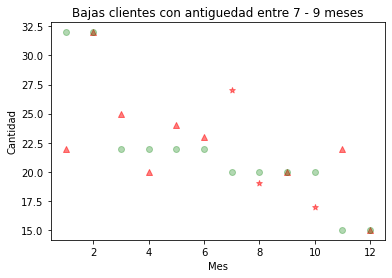

In [137]:
plt.scatter(x_train, y_train, c='red', marker='^', alpha=0.5)
plt.scatter(x_test , y_test , c='red', marker='*', alpha=0.5)
plt.scatter(x_train, y_predic_train_m1, c='green', marker='o', alpha=0.3)
plt.scatter(x_test , y_predic_test_m1 , c='green', marker='o', alpha=0.3)
plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.title('Bajas clientes con antiguedad entre 7 - 9 meses')
plt.show()

In [138]:
#Guardamos los resultados
concat_y3, concat_x3 = [],[]

for _ in list(range(len(y_predic_valor))):
  concat_y3.append(y_predic_train_m1[_])
  concat_x3.append(x_train[_])

for _ in list(range(len(y_predic_valor_t))):
  concat_y3.append(y_predic_test_m1[_])
  concat_x3.append(x_test[_])

In [139]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression

# 4trim
#entrenamos datos
x1 = X[:,0]
x1 = x1[:,np.newaxis]
y1 = X[:,4]
y1 = y1[:,np.newaxis]

x_train, x_test, y_train, y_test = train_test_split(x1, y1,test_size = 0.2,
                                        random_state = 0,
                                        shuffle      = True
                                    )


#Modelo regresión Logística
logreg= LogisticRegression()
logreg.fit(x_train, y_train)
y_predic_test_m1 = logreg.predict(x_test)
y_predic_train_m1 = logreg.predict(x_train)
print('Precisión Modelo Regresión Logística')
print(logreg.score(x_train,y_train))

Precisión Modelo Regresión Logística
0.6666666666666666


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [140]:
print('Datos entrenamiento')
print(y_train)
print('Resultado predicción entrenamiento')
print(pd.DataFrame(y_predic_train_m1))

Datos entrenamiento
[[271]
 [343]
 [173]
 [174]
 [142]
 [203]
 [240]
 [153]
 [181]]
Resultado predicción entrenamiento
     0
0  271
1  271
2  173
3  174
4  142
5  203
6  343
7  181
8  181


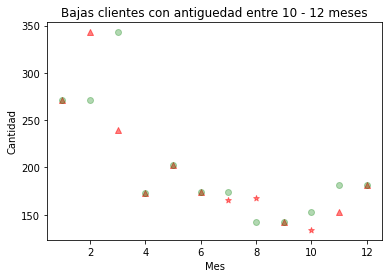

In [141]:
plt.scatter(x_train, y_train, c='red', marker='^', alpha=0.5)
plt.scatter(x_test , y_test , c='red', marker='*', alpha=0.5)
plt.scatter(x_train, y_predic_train_m1, c='green', marker='o', alpha=0.3)
plt.scatter(x_test , y_predic_test_m1 , c='green', marker='o', alpha=0.3)
plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.title('Bajas clientes con antiguedad entre 10 - 12 meses')
plt.show()

In [142]:
#Guardamos los resultados
concat_y4, concat_x4 = [],[]

for _ in list(range(len(y_predic_valor))):
  concat_y4.append(y_predic_train_m1[_])
  concat_x4.append(x_train[_])

for _ in list(range(len(y_predic_valor_t))):
  concat_y4.append(y_predic_test_m1[_])
  concat_x4.append(x_test[_])

In [143]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression

# ENTRE_1_2_ANIOS
#entrenamos datos
x1 = X[:,0]
x1 = x1[:,np.newaxis]
y1 = X[:,5]
y1 = y1[:,np.newaxis]

x_train, x_test, y_train, y_test = train_test_split(x1, y1,test_size = 0.2,
                                        random_state = 0,
                                        shuffle      = True
                                    )


#Modelo regresión Logística
logreg= LogisticRegression()
logreg.fit(x_train, y_train)
y_predic_test_m1 = logreg.predict(x_test)
y_predic_train_m1 = logreg.predict(x_train)
print('Precisión Modelo Regresión Logística')
print(logreg.score(x_train,y_train))

Precisión Modelo Regresión Logística
0.5555555555555556


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [144]:
print('Datos entrenamiento')
print(y_train)
print('Resultado predicción entrenamiento')
print(pd.DataFrame(y_predic_train_m1))

Datos entrenamiento
[[728]
 [925]
 [546]
 [672]
 [498]
 [546]
 [736]
 [484]
 [603]]
Resultado predicción entrenamiento
     0
0  728
1  728
2  546
3  546
4  498
5  546
6  546
7  603
8  603


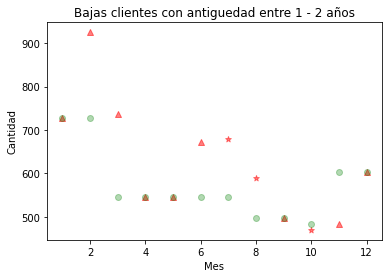

In [145]:
plt.scatter(x_train, y_train, c='red', marker='^', alpha=0.5)
plt.scatter(x_test , y_test , c='red', marker='*', alpha=0.5)
plt.scatter(x_train, y_predic_train_m1, c='green', marker='o', alpha=0.3)
plt.scatter(x_test , y_predic_test_m1 , c='green', marker='o', alpha=0.3)
plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.title('Bajas clientes con antiguedad entre 1 - 2 años')
plt.show()

In [146]:
#Guardamos los resultados
concat_y5, concat_x5 = [],[]

for _ in list(range(len(y_predic_valor))):
  concat_y5.append(y_predic_train_m1[_])
  concat_x5.append(x_train[_])

for _ in list(range(len(y_predic_valor_t))):
  concat_y5.append(y_predic_test_m1[_])
  concat_x5.append(x_test[_])

In [147]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression

# ENTRE_3_4_ANIOS
#entrenamos datos
x1 = X[:,0]
x1 = x1[:,np.newaxis]
y1 = X[:,6]
y1 = y1[:,np.newaxis]

x_train, x_test, y_train, y_test = train_test_split(x1, y1,test_size = 0.2,
                                        random_state = 0,
                                        shuffle      = True
                                    )


#Modelo regresión Logística
logreg= LogisticRegression()
logreg.fit(x_train, y_train)
y_predic_test_m1 = logreg.predict(x_test)
y_predic_train_m1 = logreg.predict(x_train)
print('Precisión Modelo Regresión Logística')
print(logreg.score(x_train,y_train))

Precisión Modelo Regresión Logística
0.6666666666666666


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [148]:
print('Datos entrenamiento')
print(y_train)
print('Resultado predicción entrenamiento')
print(pd.DataFrame(y_predic_train_m1))

Datos entrenamiento
[[ 399]
 [ 511]
 [ 318]
 [ 369]
 [ 316]
 [ 314]
 [ 424]
 [ 294]
 [1470]]
Resultado predicción entrenamiento
      0
0   399
1   399
2   318
3   369
4   316
5   314
6   511
7  1470
8  1470


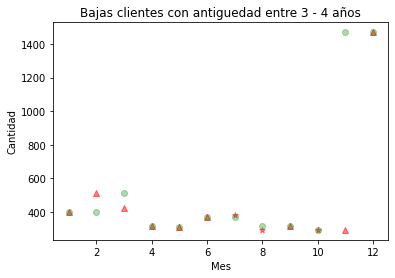

In [149]:
plt.scatter(x_train, y_train, c='red', marker='^', alpha=0.5)
plt.scatter(x_test , y_test , c='red', marker='*', alpha=0.5)
plt.scatter(x_train, y_predic_train_m1, c='green', marker='o', alpha=0.3)
plt.scatter(x_test , y_predic_test_m1 , c='green', marker='o', alpha=0.3)
plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.title('Bajas clientes con antiguedad entre 3 - 4 años')
plt.show()

In [150]:
#Guardamos los resultados
concat_y6, concat_x6 = [],[]

for _ in list(range(len(y_predic_valor))):
  concat_y6.append(y_predic_train_m1[_])
  concat_x6.append(x_train[_])

for _ in list(range(len(y_predic_valor_t))):
  concat_y6.append(y_predic_test_m1[_])
  concat_x6.append(x_test[_])

In [151]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression

# MAS_5_ANIOS
#entrenamos datos
x1 = X[:,0]
x1 = x1[:,np.newaxis]
y1 = X[:,7]
y1 = y1[:,np.newaxis]

x_train, x_test, y_train, y_test = train_test_split(x1, y1,test_size = 0.2,
                                        random_state = 0,
                                        shuffle      = True
                                    )


#Modelo regresión Logística
logreg= LogisticRegression()
logreg.fit(x_train, y_train)
y_predic_test_m1 = logreg.predict(x_test)
y_predic_train_m1 = logreg.predict(x_train)
print('Precisión Modelo Regresión Logística')
print(logreg.score(x_train,y_train))

Precisión Modelo Regresión Logística
0.6666666666666666


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [152]:
print('Datos entrenamiento')
print(y_train)
print('Resultado predicción entrenamiento')
print(pd.DataFrame(y_predic_train_m1))

Datos entrenamiento
[[ 19]
 [ 22]
 [ 29]
 [ 58]
 [ 10]
 [ 21]
 [ 38]
 [ 11]
 [105]]
Resultado predicción entrenamiento
     0
0   19
1   19
2   29
3   58
4   10
5   21
6   22
7  105
8  105


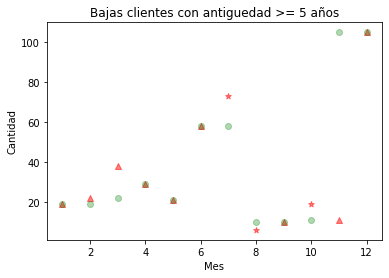

In [153]:
plt.scatter(x_train, y_train, c='red', marker='^', alpha=0.5)
plt.scatter(x_test , y_test , c='red', marker='*', alpha=0.5)
plt.scatter(x_train, y_predic_train_m1, c='green', marker='o', alpha=0.3)
plt.scatter(x_test , y_predic_test_m1 , c='green', marker='o', alpha=0.3)
plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.title('Bajas clientes con antiguedad >= 5 años')
plt.show()

In [154]:
#Guardamos los resultados
concat_y7, concat_x7 = [],[]

for _ in list(range(len(y_predic_valor))):
  concat_y7.append(y_predic_train_m1[_])
  concat_x7.append(x_train[_])

for _ in list(range(len(y_predic_valor_t))):
  concat_y7.append(y_predic_test_m1[_])
  concat_x7.append(x_test[_])